<a href="https://colab.research.google.com/github/ansh428/house-price-predictor/blob/main/Predicting_California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d camnugent/california-housing-prices



cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 28.0MB/s]


In [2]:
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [3]:
import pandas as pd

housing_pd = pd.read_csv('housing.csv')
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_pd['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [5]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [6]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,True,False,False,False,False
2151,False,True,False,False,False
15927,False,False,False,True,False
82,False,False,False,True,False
8161,True,False,False,False,False


In [7]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [8]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing_pd_shuffled['ocean_proximity'])], axis=1)

housing_pd_final = housing_pd_final.fillna(0).astype(int)


In [9]:
housing_pd_final = housing_pd_final[['longitude',	'latitude',
                                     'housing_median_age',	'total_rooms',
                                     'total_bedrooms',	'population',
                                     'households',	'median_income',
                                     '<1H OCEAN',
                                     'INLAND',	'ISLAND',
                                     'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118,34,39,2810,670,1109,624,3,1,0,0,0,0,355000
2151,-119,36,37,2185,455,1143,438,1,0,1,0,0,0,70700
15927,-122,37,46,1819,411,1534,406,4,0,0,0,1,0,229400
82,-122,37,52,340,97,200,87,1,0,0,0,1,0,112500
8161,-118,33,37,1530,290,711,283,5,1,0,0,0,0,225400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117,33,17,1768,474,1079,436,1,1,0,0,0,0,205300
17289,-119,34,42,1765,263,753,260,8,1,0,0,0,0,500001
5192,-118,33,42,1433,295,775,293,1,1,0,0,0,0,104800
12172,-117,33,10,2381,454,1323,477,2,0,1,0,0,0,140700


In [10]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20640

In [11]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1425)

In [12]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1425, 13), (1425,), (1217, 13), (1217,))

In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)


In [14]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1425, 13), (1217, 13))

In [15]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,-1,0,1,0,0,0
2,-1,0,1,0,0,0,0,0,0,0,0,1,0
3,-1,0,1,-1,-1,-1,-1,-1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


<Axes: >

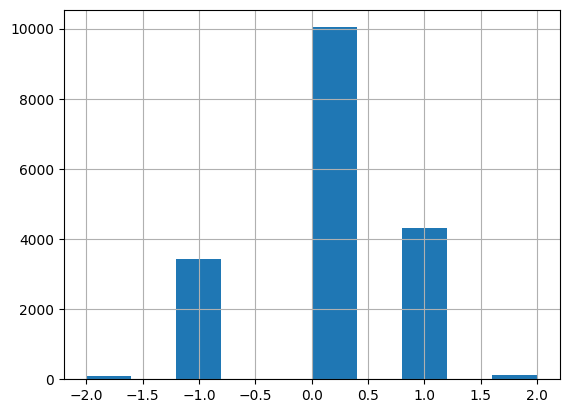

In [16]:
numeric_df = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
numeric_df[0].hist()

In [17]:
!pip install --upgrade scikit-learn


In [18]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
mse_train = mse(lm.predict(X_train), y_train)
rmse_train = np.sqrt(mse_train)

mse_val = mse(lm.predict(X_val), y_val)
rmse_val = np.sqrt(mse_val)

print(f"Train MSE: {mse_train}, Train RMSE: {rmse_train}")
print(f"Validation MSE: {mse_val}, Validation RMSE: {rmse_val}")

Train MSE: 6581167294.925896, Train RMSE: 81124.39395721792
Validation MSE: 6639505471.04963, Validation RMSE: 81483.16065942479


In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error as mse

param_dist = {
    'n_neighbors': np.arange(3, 50, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

knn_model = KNeighborsRegressor()

knn_search = RandomizedSearchCV(knn_model, param_dist,
                                n_iter=10, scoring='neg_mean_squared_error',
                                cv=5, verbose=2, n_jobs=-1, random_state=42)
knn_search.fit(X_train, y_train)

knn = knn_search.best_estimator_

rmse_train = np.sqrt(mse(knn.predict(X_train), y_train))
rmse_val = np.sqrt(mse(knn.predict(X_val), y_val))

print("Best parameters for KNN:", knn_search.best_params_)
print(f"Tuned KNN Train RMSE: {rmse_train}")
print(f"Tuned KNN Validation RMSE: {rmse_val}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNN: {'weights': 'uniform', 'p': 2, 'n_neighbors': 23}
Tuned KNN Train RMSE: 75135.79240449208
Tuned KNN Validation RMSE: 76689.94269675897


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error as mse

param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(5, 50, 5),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
}

rf_model = RandomForestRegressor(random_state=42)

rf_search = RandomizedSearchCV(rf_model, param_dist,
                               n_iter=10, scoring='neg_mean_squared_error',
                               cv=5, verbose=2, n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)

rfr = rf_search.best_estimator_

rmse_train = np.sqrt(mse(rfr.predict(X_train), y_train))
rmse_val = np.sqrt(mse(rfr.predict(X_val), y_val))

print("Best parameters for Random Forest:", rf_search.best_params_)
print(f"Tuned RF Train RMSE: {rmse_train}")
print(f"Tuned RF Validation RMSE: {rmse_val}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_depth': 15}
Tuned RF Train RMSE: 72825.00247244231
Tuned RF Validation RMSE: 75187.4076687057


In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error as mse

param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 10),
    'subsample': np.linspace(0.5, 1.0, 5),
}

gbr_model = GradientBoostingRegressor(random_state=42)

gbr_search = RandomizedSearchCV(gbr_model, param_dist,
                                n_iter=10, scoring='neg_mean_squared_error',
                                cv=5, verbose=2, n_jobs=-1, random_state=42)
gbr_search.fit(X_train, y_train)

gbr = gbr_search.best_estimator_

rmse_train = np.sqrt(mse(gbr.predict(X_train), y_train))
rmse_val = np.sqrt(mse(gbr.predict(X_val), y_val))

print("Best parameters for Gradient Boosting:", gbr_search.best_params_)
print(f"Tuned GBR Train RMSE: {rmse_train}")
print(f"Tuned GBR Validation RMSE: {rmse_val}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Gradient Boosting: {'subsample': 0.625, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.042222222222222223}
Tuned GBR Train RMSE: 72456.58915104355
Tuned GBR Validation RMSE: 74688.46643883653


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

!pip install keras-tuner

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_squared_error as mse
import numpy as np

def build_nn_model(hp):
    model = Sequential()
    model.add(InputLayer((13,)))

    for i in range(hp.Int('layers', 1, 4)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation='relu'
        ))

    model.add(Dense(1, 'linear'))

    learning_rate = hp.Choice('learning_rate', [0.001, 0.01, 0.1])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mse',
                  metrics=[RootMeanSquaredError()])

    return model

tuner = kt.RandomSearch(
    build_nn_model,
    objective='val_root_mean_squared_error',
    max_trials=10,
    executions_per_trial=1,
    directory='nn_tuning',
    project_name='house_price_nn'
)

tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

best_nn = tuner.get_best_models(num_models=1)[0]

rmse_train = np.sqrt(mse(best_nn.predict(X_train), y_train))
rmse_val = np.sqrt(mse(best_nn.predict(X_val), y_val))

print(f"Tuned Neural Network Train RMSE: {rmse_train}")
print(f"Tuned Neural Network Validation RMSE: {rmse_val}")



Trial 10 Complete [00h 03m 42s]
val_root_mean_squared_error: 74660.703125

Best val_root_mean_squared_error So Far: 74660.703125
Total elapsed time: 00h 22m 01s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Tuned Neural Network Train RMSE: 73536.47345365428
Tuned Neural Network Validation RMSE: 74660.70109502053


In [23]:
models = {
    "Neural Network": best_nn,
    "Random Forest": rfr,
    "Gradient Boosting": gbr,
    "KNN": knn
}

for name, model in models.items():
    train_rmse = np.sqrt(mse(model.predict(X_train), y_train))
    val_rmse = np.sqrt(mse(model.predict(X_val), y_val))
    print(f"{name} → Train RMSE: {train_rmse:.2f}, Validation RMSE: {val_rmse:.2f}")


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Neural Network → Train RMSE: 73536.47, Validation RMSE: 74660.70
Random Forest → Train RMSE: 72825.00, Validation RMSE: 75187.41
Gradient Boosting → Train RMSE: 72456.59, Validation RMSE: 74688.47
KNN → Train RMSE: 75135.79, Validation RMSE: 76689.94


In [24]:
import matplotlib.pyplot as plt

y_pred_nn = best_nn.predict(X_val)
y_pred_rf = rfr.predict(X_val)
y_pred_gbr = gbr.predict(X_val)
y_pred_knn = knn.predict(X_val)

models = {
    "Neural Network": y_pred_nn.flatten(),
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gbr,
    "KNN": y_pred_knn
}


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


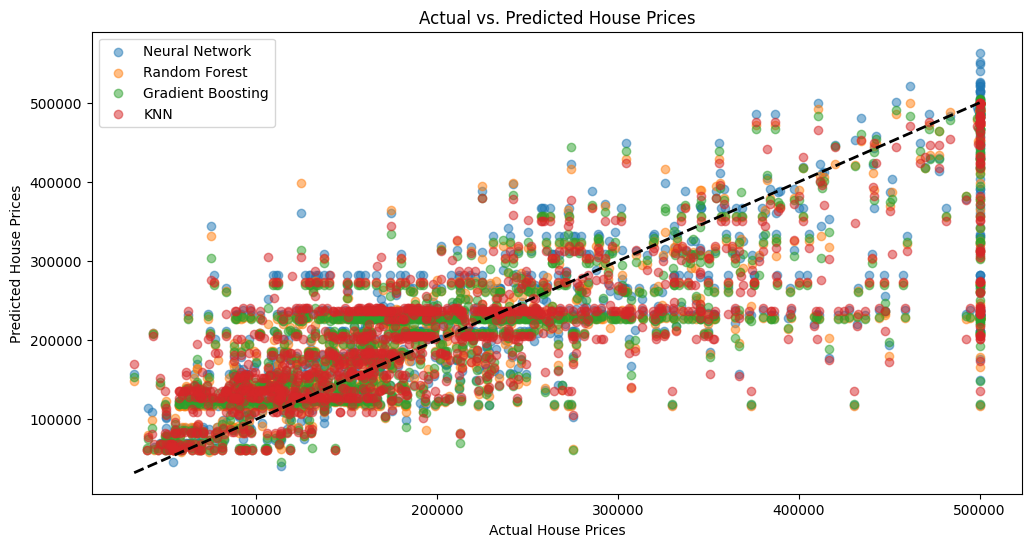

In [25]:
plt.figure(figsize=(12, 6))

for model_name, y_pred in models.items():
    plt.scatter(y_val, y_pred, label=model_name, alpha=0.5)

plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.legend()
plt.title("Actual vs. Predicted House Prices")
plt.show()


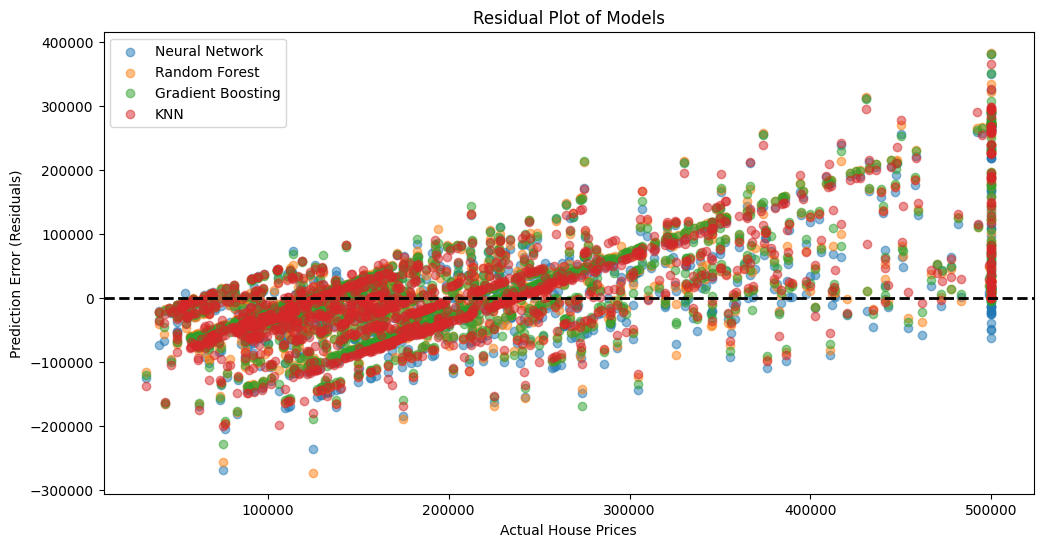

In [26]:
plt.figure(figsize=(12, 6))

for model_name, y_pred in models.items():
    residuals = y_val - y_pred
    plt.scatter(y_val, residuals, label=model_name, alpha=0.5)

plt.axhline(y=0, color='black', linestyle='--', lw=2)
plt.xlabel("Actual House Prices")
plt.ylabel("Prediction Error (Residuals)")
plt.legend()
plt.title("Residual Plot of Models")
plt.show()


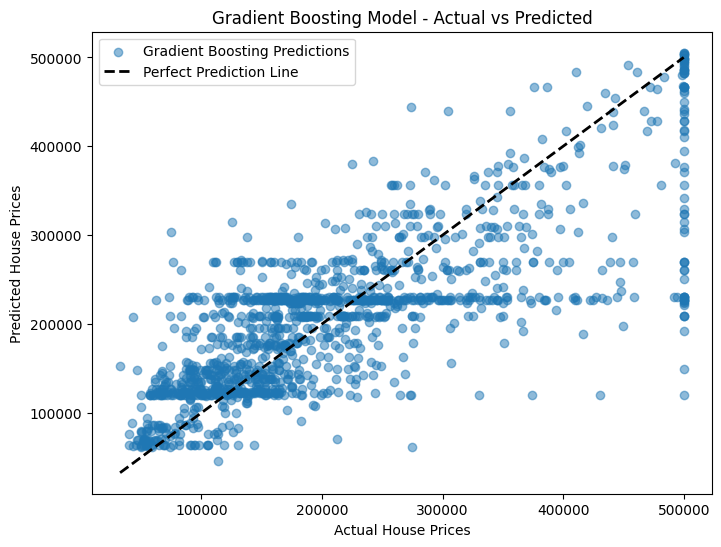

In [27]:
import matplotlib.pyplot as plt

y_pred_gbr = gbr.predict(X_val)

plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_gbr, alpha=0.5, label="Gradient Boosting Predictions")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Gradient Boosting Model - Actual vs Predicted")
plt.legend()
plt.show()


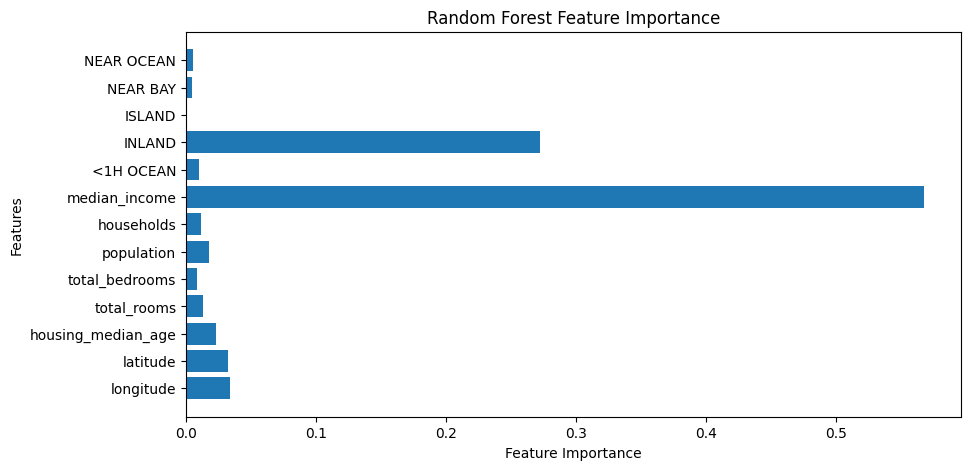

In [28]:
import matplotlib.pyplot as plt

feature_importances = rfr.feature_importances_
feature_names = housing_pd_final.columns[:-1]

plt.figure(figsize=(10,5))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()


In [30]:
import joblib

# Save the trained Gradient Boosting model
joblib.dump(gbr, "gradient_boosting_model.pkl")

print("Gradient Boosting model saved successfully!")


Gradient Boosting model saved successfully!


In [31]:
import joblib

gbr_loaded = joblib.load("gradient_boosting_model.pkl")

print("Model loaded successfully!")


Model loaded successfully!


In [35]:
def predict_house_price(features):
    model = joblib.load("gradient_boosting_model.pkl")
    processed_features = preprocessor(np.array([features]))
    predicted_price = model.predict(processed_features)
    return f"Predicted House Price: ${predicted_price[0]:,.2f}"

new_house_features = [-121.5, 37.7, 30, 6000, 1200, 2000, 800, 5.0, 0, 1, 0, 0, 0]
print(predict_house_price(new_house_features))


Predicted House Price: $335,972.45


In [36]:
pip install streamlit joblib numpy pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00
